In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from gensim import corpora, models
import string
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Loading the data

In [2]:
file_path = r"nytimes_news_articles.csv"
df = pd.read_csv(file_path)

### Displaying the data

In [3]:
# Read 10 rows of data from the CSV file
print(df['Paragraph'].head(10))

doc_data = df['Paragraph'].fillna('')

0    WASHINGTON — Stellar pitching kept the Mets af...
1    Mayor Bill de Blasio’s counsel and chief legal...
2    In the early morning hours of Labor Day last y...
3    It was the Apple Store in New York City before...
4    OMAHA — The United States Olympic swimming tri...
5    OMAHA — In the first three races of her third ...
6    Lionsgate is near a deal to buy Starz, uniting...
7    Under slate-colored light slanting from the sk...
8    WINTER GARDEN, Fla. — Jeff Hornacek, the new K...
9    As Washington Heights rejoiced on Wednesday ov...
Name: Paragraph, dtype: object


In [4]:
def preprocess_text(text: str):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Preprocess the text data
cleaned_text = doc_data.apply(preprocess_text)

In [5]:
cleaned_text

0       [washington, stellar, pitching, kept, mets, af...
1       [mayor, bill, de, blasio, counsel, chief, lega...
2       [early, morning, hour, labor, day, last, year,...
3       [apple, store, new, york, city, thing, apple, ...
4       [omaha, united, state, olympic, swimming, tria...
                              ...                        
8883    [second, critical, contest, america, 2016, ele...
8884    [april, 1, police, officer, 108th, precinct, c...
8885    [khilad, india, cattle, camp, dusty, back, roa...
8886    [director, abrams, dropped, possible, hint, fr...
8887    [palos, verdes, estate, high, atop, oceanside,...
Name: Paragraph, Length: 8888, dtype: object

In [6]:
flattened_text = cleaned_text.tolist()
flattened_text

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(flattened_text)
doc_term_matrix = [dictionary.doc2bow(text) for text in cleaned_text]

In [12]:
print("Dictionary:")
print(dictionary)

# Print the document-term matrix
print("\nDocument-Term Matrix:")
for doc in doc_term_matrix:
    print(doc)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Choose the LDA algorithm for topic modeling
lda_model = models.LdaModel

In [15]:
from gensim.models import CoherenceModel

# Define a range of candidate numbers of topics
num_topics_range = range(5, 21)  # Adjust the range based on your requirements

# Initialize lists to store coherence scores
coherence_scores = []

# Iterate over the range of candidate numbers of topics
for num_topics in num_topics_range:
    # Train the LDA model
    lda_model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)

    # Compute coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=flattened_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Store the coherence score
    coherence_scores.append(coherence_score)

# Find the optimal number of topics with the highest coherence score
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]

# Print the coherence scores for each number of topics
for num_topics, coherence_score in zip(num_topics_range, coherence_scores):
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}")

# Print the optimal number of topics
print(f"\nOptimal Number of Topics: {optimal_num_topics}")


Number of Topics: 5, Coherence Score: 0.3077345544771608
Number of Topics: 6, Coherence Score: 0.3256020713154341
Number of Topics: 7, Coherence Score: 0.337607318602953
Number of Topics: 8, Coherence Score: 0.3686555134514212
Number of Topics: 9, Coherence Score: 0.34089073719119384
Number of Topics: 10, Coherence Score: 0.35250704282451584
Number of Topics: 11, Coherence Score: 0.38598500325020574
Number of Topics: 12, Coherence Score: 0.4013371543441282
Number of Topics: 13, Coherence Score: 0.40320443762584585
Number of Topics: 14, Coherence Score: 0.3895937245014047
Number of Topics: 15, Coherence Score: 0.37650334678826713
Number of Topics: 16, Coherence Score: 0.4007949454023505
Number of Topics: 17, Coherence Score: 0.3681041635998487
Number of Topics: 18, Coherence Score: 0.4024475573360793
Number of Topics: 19, Coherence Score: 0.37427405120119317
Number of Topics: 20, Coherence Score: 0.37552770807315555

Optimal Number of Topics: 13


In [9]:
# Train the LDA model
num_topics = 13 # You can adjust this number based on your requirement
lda_model = lda_model(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=50)

In [10]:
# Print the topics
topics = lda_model.print_topics(num_topics=num_topics, num_words=3)
for topic in topics:
    print(topic)

(0, '0.011*"city" + 0.009*"building" + 0.008*"new"')
(1, '0.023*"court" + 0.017*"case" + 0.012*"law"')
(2, '0.011*"like" + 0.008*"one" + 0.007*"said"')
(3, '0.024*"trump" + 0.014*"said" + 0.013*"republican"')
(4, '0.015*"said" + 0.014*"company" + 0.010*"year"')
(5, '0.033*"said" + 0.009*"police" + 0.009*"people"')
(6, '0.035*"car" + 0.027*"vehicle" + 0.024*"brazil"')
(7, '0.020*"new" + 0.017*"art" + 0.014*"york"')
(8, '0.020*"game" + 0.013*"said" + 0.011*"first"')
(9, '0.013*"said" + 0.006*"drug" + 0.006*"health"')
(10, '0.015*"school" + 0.013*"student" + 0.011*"said"')
(11, '0.016*"said" + 0.010*"state" + 0.010*"government"')
(12, '0.019*"player" + 0.016*"team" + 0.013*"sport"')


In [11]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00


In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

In [13]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=flattened_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f"\nCoherence Score: {coherence_lda}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.4702739177225376


In [14]:
# Compute perplexity
perplexity = lda_model.log_perplexity(doc_term_matrix)
print(f"Perplexity: {perplexity}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: -9.023468718771293


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


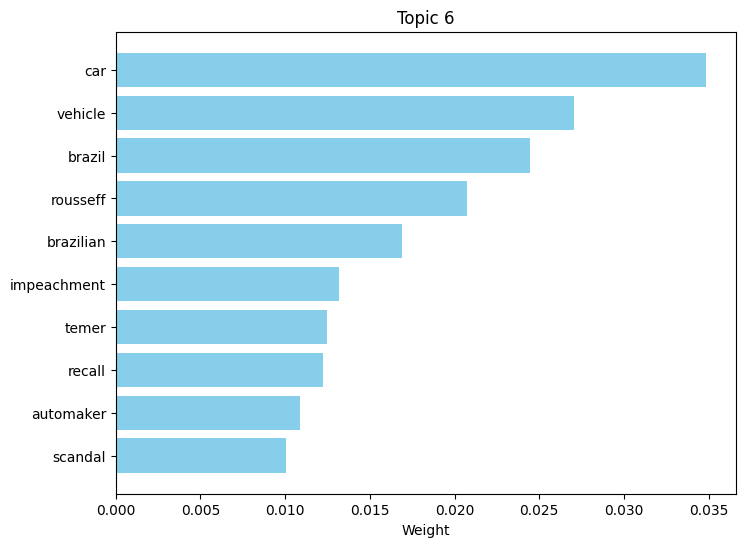

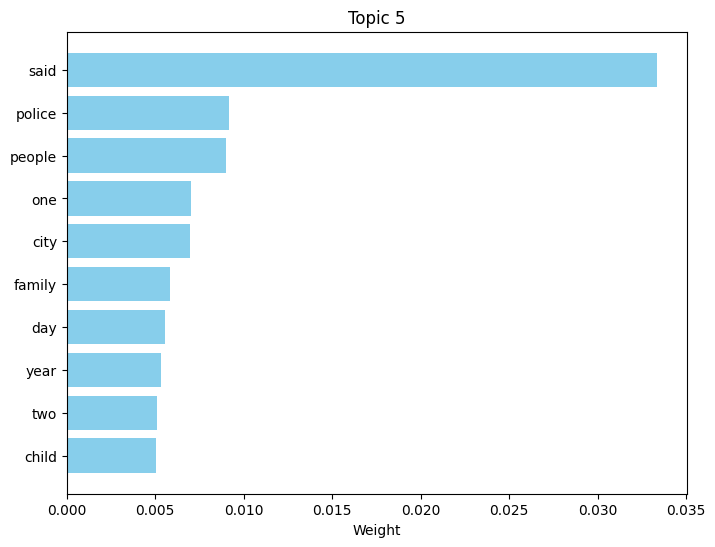

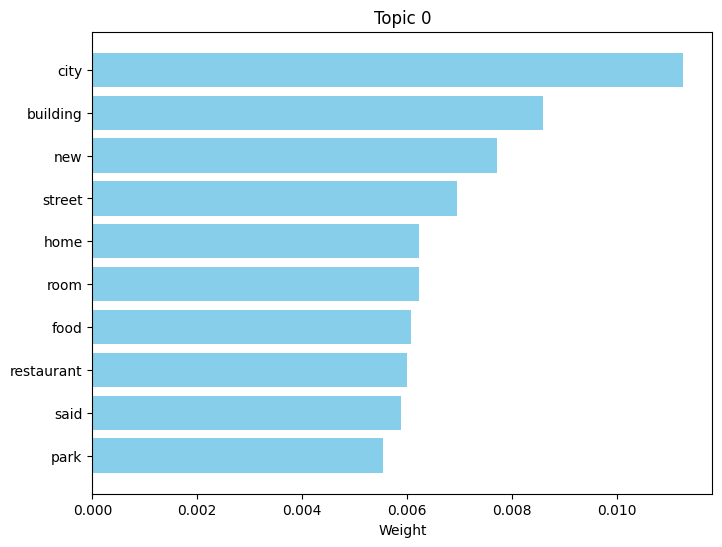

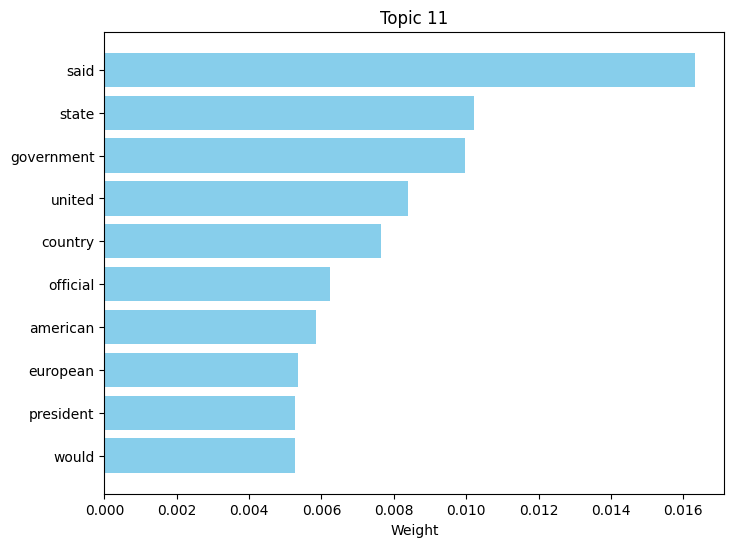

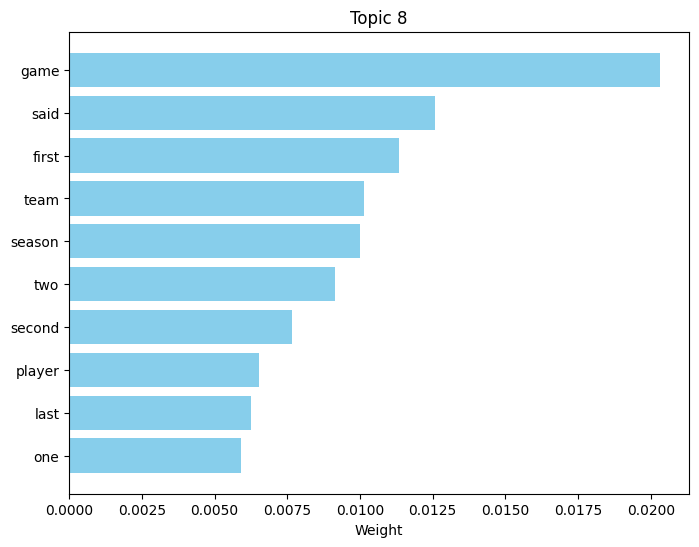

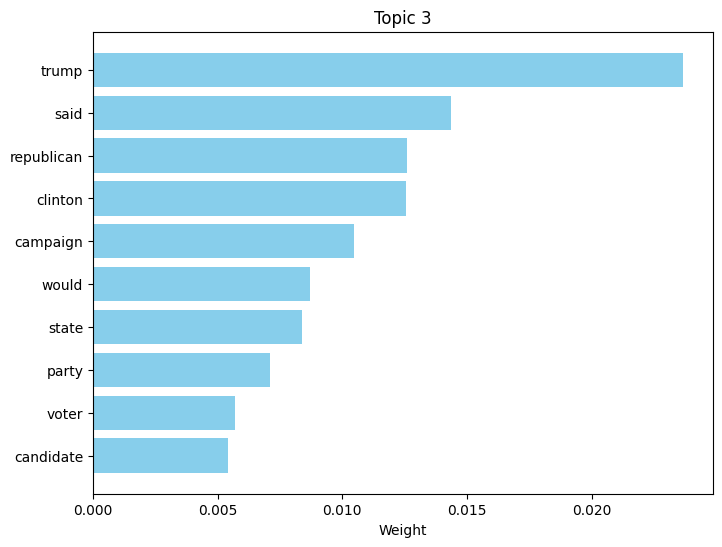

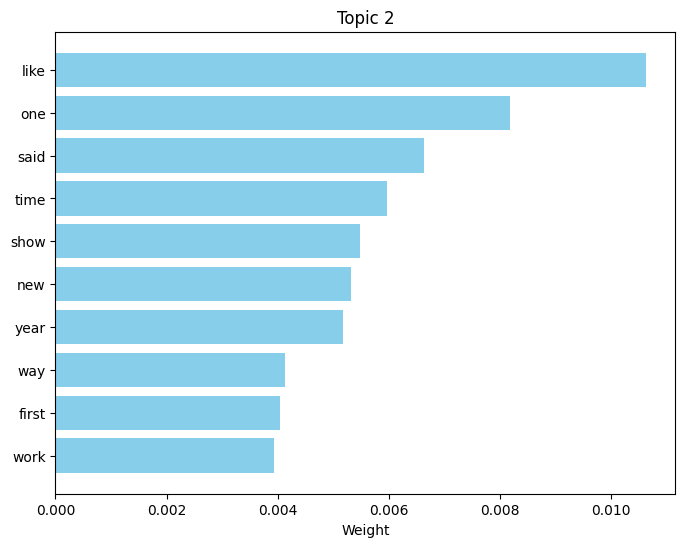

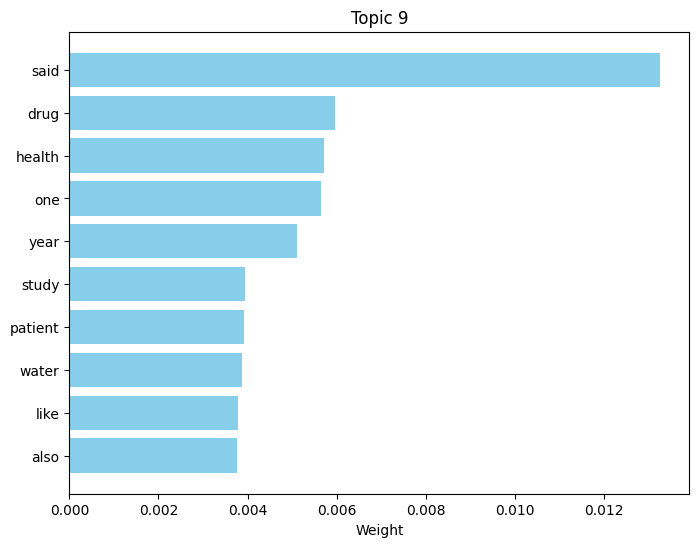

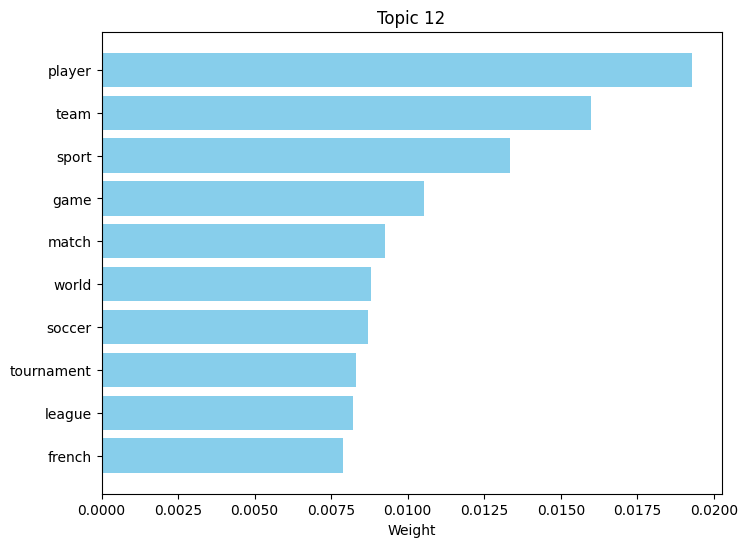

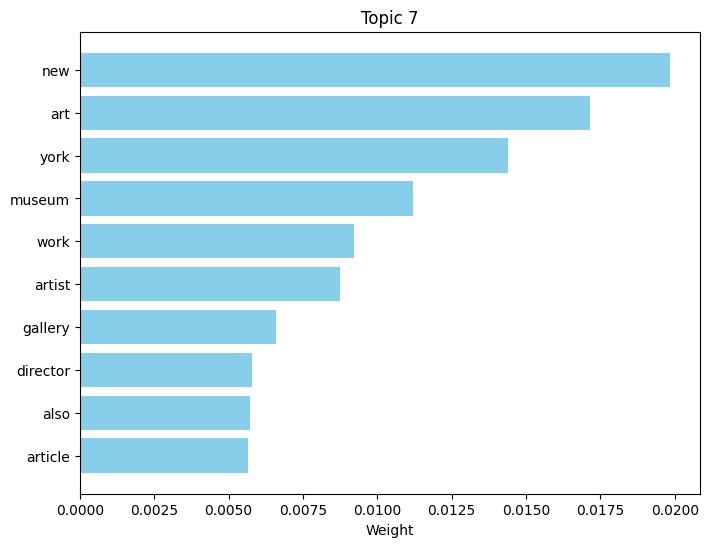

In [15]:
import matplotlib.pyplot as plt

def visualize_topics(lsi_model):
    topics = lda_model.show_topics(formatted=False)

    for topic_idx, topic in topics:
        words = [word for word, _ in topic]
        weights = [weight for _, weight in topic]

        plt.figure(figsize=(8, 6))
        plt.barh(words, weights, color='skyblue')
        plt.xlabel('Weight')
        plt.title(f'Topic {topic_idx}')
        plt.gca().invert_yaxis()
        plt.show()

# Visualize topics
visualize_topics(lda_model)